In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
# Read in the data
pd.set_option('display.max_columns', None)
players = pd.read_csv('data/players.csv')
games = pd.read_csv('data/games.csv')
appearances = pd.read_csv('data/appearances.csv')
clubs = pd.read_csv('data/clubs.csv')
competitions = pd.read_csv('data/competitions.csv')
club_games = pd.read_csv('data/club_games.csv')
game_events = pd.read_csv('data/game_events.csv')
player_valuations = pd.read_csv('data/player_valuations.csv')
players.head(5)

,player_id,name,current_club_id,current_club_name,country_of_citizenship,country_of_birth,city_of_birth,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,agent_name,contract_expiration_date,current_club_domestic_competition_id,first_name,last_name,player_code,image_url,last_season,url
0,134354,Ian Raeymaekers,498,Ksc Lokeren,Belgium,Belgium,Aalst,1995-01-30,Attack,Centre-Forward,Right,0,NaN,50000.0,NaN,NaN,BE1,Ian,Raeymaekers,ian-raeymaekers,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/ian-raeymaeker...
1,99946,Mohamed Camara,1095,Es Troyes Ac,Guinea,Guinea,Conakry,1990-09-20,Attack,Centre-Forward,Right,180,NaN,300000.0,NaN,NaN,FR1,Mohamed,Camara,mohamed-camara,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/mohamed-camara...
2,76948,Pablo Olivera,979,Moreirense Fc,Uruguay,Uruguay,Melo,1987-12-08,Attack,Centre-Forward,Right,175,25000.0,600000.0,NaN,NaN,PO1,Pablo,Olivera,pablo-olivera,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/pablo-olivera/...
3,108372,Aliosman Aydin,38,Fortuna Dusseldorf,Turkey,Germany,Dormagen,1992-02-06,Attack,Centre-Forward,Right,178,NaN,125000.0,NaN,NaN,L1,Aliosman,Aydin,aliosman-aydin,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/aliosman-aydin...
4,78820,Jaime Alfonso Ruiz,354,Kv Mechelen,Colombia,Colombia,Cali,1984-01-03,Attack,Centre-Forward,Right,184,NaN,1700000.0,NaN,NaN,BE1,Jaime Alfonso,Ruiz,jaime-alfonso-ruiz,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/jaime-alfonso-...


In [144]:
games_apps = pd.merge(games, appearances, on='game_id', how='inner')
games_apps.columns

Index(['game_id', 'competition_id_x', 'competition_type', 'season', 'round',
       'date_x', 'home_club_id', 'away_club_id', 'home_club_goals',
       'away_club_goals', 'aggregate', 'home_club_position',
       'away_club_position', 'club_home_name', 'club_away_name',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'url', 'appearance_id', 'player_id',
       'player_club_id', 'player_current_club_id', 'date_y', 'player_name',
       'competition_id_y', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [145]:
# define the season
player_valuations['season'] = player_valuations['datetime'].apply(lambda x: int(x[:4]) if int(x[5:7]) > 7 else int(x[:4]) - 1)

# remove other dates
player_valuations = player_valuations[['player_id', 'season', 'market_value_in_eur', 'player_club_domestic_competition_id']]

In [146]:
player_valuations.head(5)

,player_id,season,market_value_in_eur,player_club_domestic_competition_id
0,99946,2013,150000,FR1
1,99946,2013,100000,FR1
2,76948,2009,125000,PO1
3,76948,2010,250000,PO1
4,76948,2010,350000,PO1


In [147]:
aggregations = games_apps.groupby(['player_id', 'season'])\
    [['goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played']].sum().sort_values('season', ascending=False)
# aggregations = games_apps.groupby(['player_id', 'season'])\
#     [['goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played']].sum().sort_values('season', ascending=False)
aggregations['avg_attendance'] = games_apps.groupby(['player_id', 'season'])['attendance'].mean().round(0)
aggregations['matches_played'] = games_apps.query('minutes_played > 0').groupby(['player_id', 'season'])['game_id'].count()
s = games_apps[['player_id', 'season', 'player_club_id']].drop_duplicates()
aggregations = pd.merge(aggregations, s, on=['player_id', 'season'], how='left')
#aggregations.reset_index(inplace=True)
aggregations.sort_values('player_id', ascending=False)

,player_id,season,goals,assists,yellow_cards,red_cards,minutes_played,avg_attendance,matches_played,player_club_id
0,1059630,2022,0,0,0,0,112,0.0,7,18105
5487,1056907,2022,0,0,1,0,93,2278.0,4,2995
5485,1050852,2022,0,0,0,0,45,0.0,1,48726
5482,1050249,2022,0,0,0,0,137,0.0,4,3592
5480,1045972,2022,0,2,2,0,364,6362.0,12,2778
...,...,...,...,...,...,...,...,...,...,...
57731,26,2015,0,0,1,0,1260,43344.0,14,16
43761,26,2017,0,0,0,0,92,58726.0,3,16
44044,26,2016,0,0,0,0,1020,52136.0,11,16
67511,10,2014,16,9,6,0,2289,29442.0,40,398


In [148]:
df = pd.merge(aggregations, player_valuations, on=['player_id', 'season'], how='inner')

# keep only the highest market value for each player in a season
df = df.sort_values('market_value_in_eur', ascending=False).drop_duplicates(['player_id', 'season']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59935 entries, 0 to 59934
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   player_id                            59935 non-null  int64  
 1   season                               59935 non-null  int64  
 2   goals                                59935 non-null  int64  
 3   assists                              59935 non-null  int64  
 4   yellow_cards                         59935 non-null  int64  
 5   red_cards                            59935 non-null  int64  
 6   minutes_played                       59935 non-null  int64  
 7   avg_attendance                       59935 non-null  float64
 8   matches_played                       59935 non-null  int64  
 9   player_club_id                       59935 non-null  int64  
 10  market_value_in_eur                  59935 non-null  int64  
 11  player_club_domestic_competi

In [149]:
# add data about the club
df = pd.merge(df, clubs, left_on='player_club_id', right_on='club_id', how='left')
df = df.drop(['url', 'club_code'], axis=1)

# rename some columns
df = df.rename(columns={'name': 'club_name'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59935 entries, 0 to 59934
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   player_id                            59935 non-null  int64  
 1   season                               59935 non-null  int64  
 2   goals                                59935 non-null  int64  
 3   assists                              59935 non-null  int64  
 4   yellow_cards                         59935 non-null  int64  
 5   red_cards                            59935 non-null  int64  
 6   minutes_played                       59935 non-null  int64  
 7   avg_attendance                       59935 non-null  float64
 8   matches_played                       59935 non-null  int64  
 9   player_club_id                       59935 non-null  int64  
 10  market_value_in_eur                  59935 non-null  int64  
 11  player_club_domestic_competi

In [150]:
df.head(5)

,player_id,season,goals,assists,yellow_cards,red_cards,minutes_played,avg_attendance,matches_played,player_club_id,market_value_in_eur,player_club_domestic_competition_id,club_id,club_name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name
0,342229,2018,37,14,7,1,3030,41067.0,37,583,200000000,FR1,583.0,Fc Paris Saint Germain,FR1,NaN,29.0,25.3,18.0,62.1,14.0,Parc des Princes,49691.0,€-93.20m,Christophe Galtier
1,342229,2019,24,12,2,0,2051,40012.0,28,583,200000000,FR1,583.0,Fc Paris Saint Germain,FR1,NaN,29.0,25.3,18.0,62.1,14.0,Parc des Princes,49691.0,€-93.20m,Christophe Galtier
2,28003,2017,45,20,7,0,4468,53053.0,54,131,180000000,FR1,131.0,Fc Barcelona,ES1,NaN,24.0,25.3,10.0,41.7,19.0,Spotify Camp Nou,99354.0,€-118.00m,Xavi
3,68290,2018,20,10,4,0,1990,39808.0,24,583,180000000,FR1,583.0,Fc Paris Saint Germain,FR1,NaN,29.0,25.3,18.0,62.1,14.0,Parc des Princes,49691.0,€-93.20m,Christophe Galtier
4,68290,2017,25,16,8,0,2427,42564.0,27,583,180000000,FR1,583.0,Fc Paris Saint Germain,FR1,NaN,29.0,25.3,18.0,62.1,14.0,Parc des Princes,49691.0,€-93.20m,Christophe Galtier


In [151]:
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
players['age'] = (pd.to_datetime('today') - players['date_of_birth']).astype('<m8[Y]')
# merge in some useful columns

In [152]:
players = players[['player_id', 'name', 'height_in_cm', 'country_of_citizenship',\
                    'country_of_birth', 'date_of_birth', 'position', 'sub_position',\
                        'foot', 'highest_market_value_in_eur']]

In [153]:
# merge in some useful columns about the player
df = pd.merge(df, players, on='player_id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59935 entries, 0 to 59934
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   player_id                            59935 non-null  int64         
 1   season                               59935 non-null  int64         
 2   goals                                59935 non-null  int64         
 3   assists                              59935 non-null  int64         
 4   yellow_cards                         59935 non-null  int64         
 5   red_cards                            59935 non-null  int64         
 6   minutes_played                       59935 non-null  int64         
 7   avg_attendance                       59935 non-null  float64       
 8   matches_played                       59935 non-null  int64         
 9   player_club_id                       59935 non-null  int64         
 10  market_val

In [154]:
# FIKS DENNE KOLONNA SENERE
# drop columns where club_id is NaN
# df = df.dropna(subset=['club_id'])
# df['net_transfer_record'] = df['net_transfer_record'].apply(lambda x: x if str(x) != '+-0' else 0)
# df['net_transfer_record'] = df['net_transfer_record'].apply(lambda x: int(float(str(x).replace('€', '').replace('m', '')) * 1000000))
# df.query('net_transfer_record == "+-0"')
# replace +-0 with int 0

In [155]:
df['season_age'] = df['season'] - df['date_of_birth'].dt.year

In [156]:
# save to csv
df.to_csv('data/df.csv', index=False)
df.head()

,player_id,season,goals,assists,yellow_cards,red_cards,minutes_played,avg_attendance,matches_played,player_club_id,market_value_in_eur,player_club_domestic_competition_id,club_id,club_name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,name,height_in_cm,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,foot,highest_market_value_in_eur,season_age
0,342229,2018,37,14,7,1,3030,41067.0,37,583,200000000,FR1,583.0,Fc Paris Saint Germain,FR1,NaN,29.0,25.3,18.0,62.1,14.0,Parc des Princes,49691.0,€-93.20m,Christophe Galtier,Kylian Mbappé,178,France,France,1998-12-20,Attack,Centre-Forward,Right,200000000.0,20.0
1,342229,2019,24,12,2,0,2051,40012.0,28,583,200000000,FR1,583.0,Fc Paris Saint Germain,FR1,NaN,29.0,25.3,18.0,62.1,14.0,Parc des Princes,49691.0,€-93.20m,Christophe Galtier,Kylian Mbappé,178,France,France,1998-12-20,Attack,Centre-Forward,Right,200000000.0,21.0
2,28003,2017,45,20,7,0,4468,53053.0,54,131,180000000,FR1,131.0,Fc Barcelona,ES1,NaN,24.0,25.3,10.0,41.7,19.0,Spotify Camp Nou,99354.0,€-118.00m,Xavi,Lionel Messi,170,Argentina,Argentina,1987-06-24,Attack,Right Winger,Left,180000000.0,30.0
3,68290,2018,20,10,4,0,1990,39808.0,24,583,180000000,FR1,583.0,Fc Paris Saint Germain,FR1,NaN,29.0,25.3,18.0,62.1,14.0,Parc des Princes,49691.0,€-93.20m,Christophe Galtier,Neymar,175,Brazil,Brazil,1992-02-05,Attack,Left Winger,Right,180000000.0,26.0
4,68290,2017,25,16,8,0,2427,42564.0,27,583,180000000,FR1,583.0,Fc Paris Saint Germain,FR1,NaN,29.0,25.3,18.0,62.1,14.0,Parc des Princes,49691.0,€-93.20m,Christophe Galtier,Neymar,175,Brazil,Brazil,1992-02-05,Attack,Left Winger,Right,180000000.0,25.0


c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


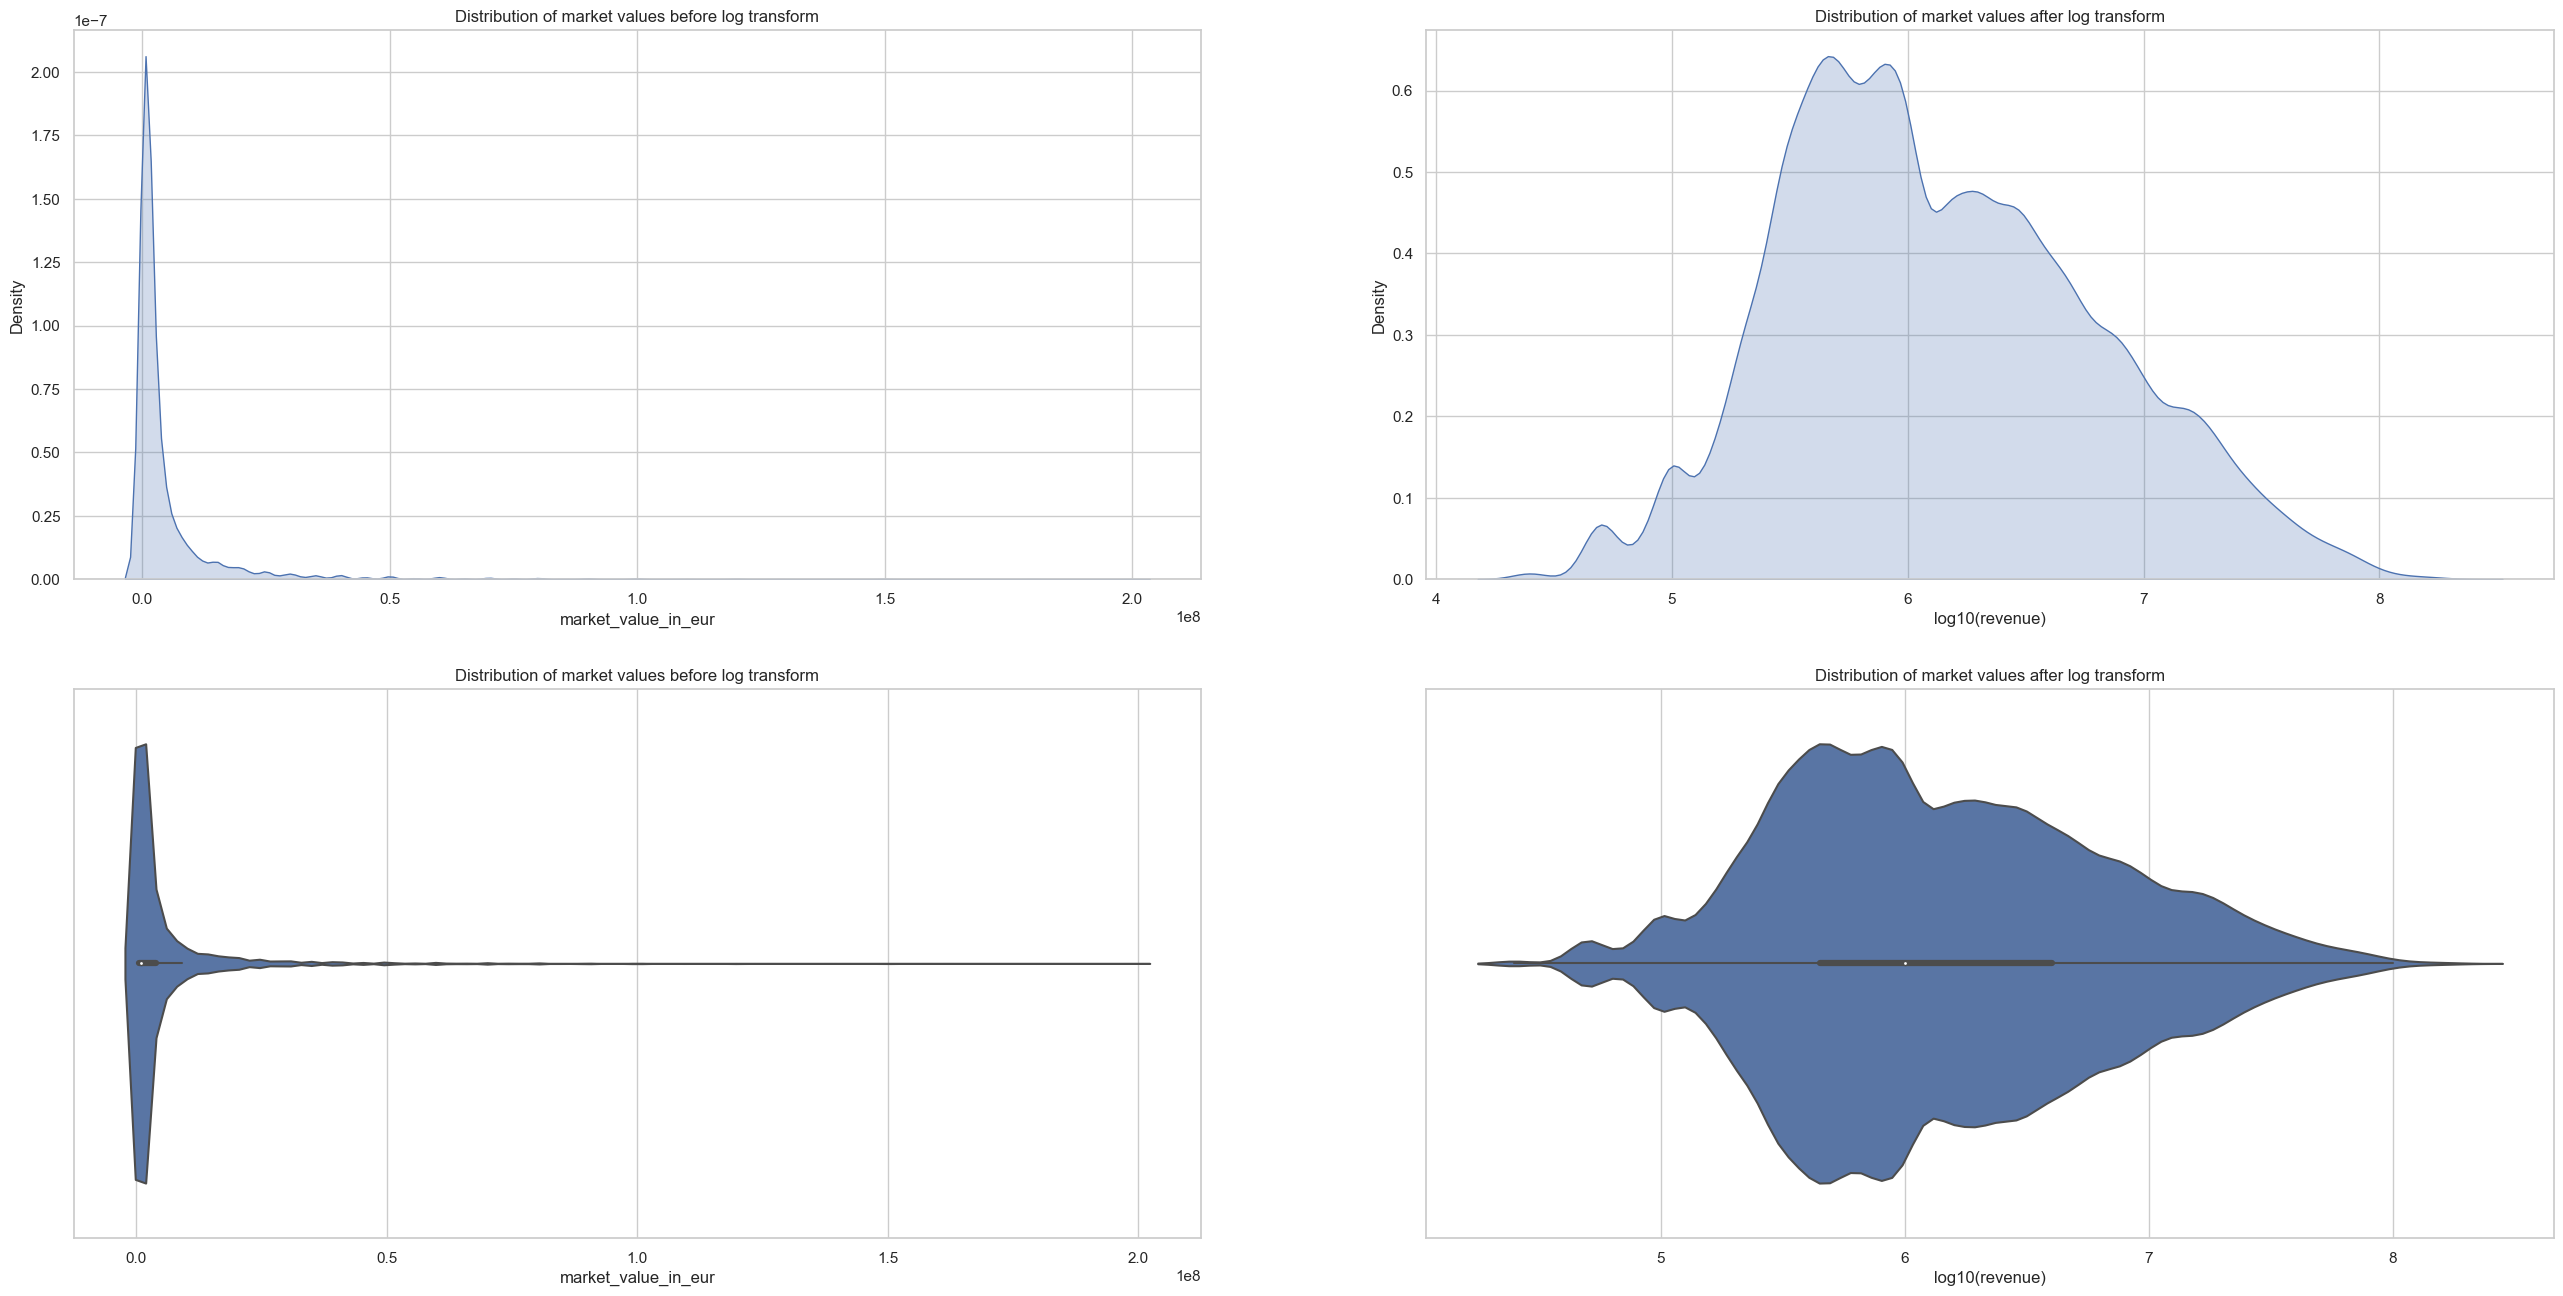

In [157]:
# look at the distribution of revenue
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(figsize=(32, 16), nrows=2, ncols=2, dpi=100)
sns.kdeplot(df.market_value_in_eur, fill=True, ax=ax1)
ax1.set_title('Distribution of market values before log transform');
sns.kdeplot(x=np.log10(df.market_value_in_eur).rename('log10(revenue)'), fill=True, ax=ax2)
ax2.set_title('Distribution of market values after log transform');
#sns.boxplot(x=df.market_value_in_eur, ax=ax3)
sns.violinplot(df.market_value_in_eur, ax=ax3)
ax3.set_title('Distribution of market values before log transform');
#sns.boxplot(x=np.log10(df.market_value_in_eur).rename('log10(revenue)'), ax=ax4)
sns.violinplot(x=np.log10(df.market_value_in_eur).rename('log10(revenue)'), ax=ax4)
ax4.set_title('Distribution of market values after log transform');

<AxesSubplot:xlabel='position', ylabel='market_value_in_eur'>

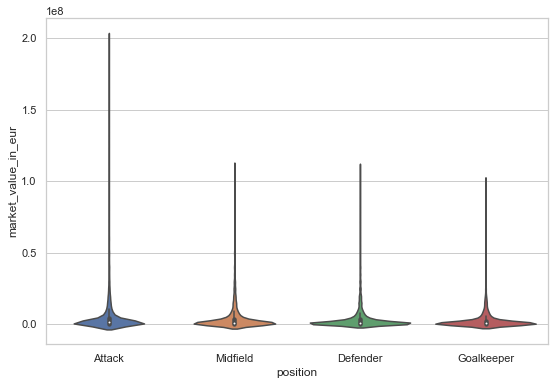

In [158]:
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.violinplot(x='position', y='market_value_in_eur', data=df)